### Imports

In [107]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

In [165]:
def load_data(directory):
    data = pd.read_csv(directory,header=None).values
    X = data[:,0].reshape(-1,1)
    Y = data[:,1].reshape(-1,1)
    return X,Y

def log_scale(Y):
    return np.log(Y)

def normalizer(X,Y,cast=True,normal=True):
    mx = X.mean()
    my = Y.mean()
    sx = X.std()
    sy = Y.std()
    if normal:
        X = (X-mx)/sx
        Y = (Y-my)/sy
    if cast:
        X = X.astype(np.float32)
        Y = Y.astype(np.float32)
        
    return X,Y,mx,my,sx,sy

def create_model(X,Y,n_epochs,lr=0.01):
    model = nn.Linear(1,1)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(),lr=lr,momentum=0.7)
    
    inputs = torch.from_numpy(X)
    targets = torch.from_numpy(Y)
    
    losses = []
    for it in range(n_epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, targets)
        losses.append(loss.item())
        
        loss.backward()
        optimizer.step()
        
        print(f"epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}")
        
    return model ,losses


def plot_line_data(model,X,Y):
    
    predicted = model(torch.from_numpy(X)).detach().numpy()
    
    plt.plot(X,Y,"ro",label="Original Data")
    plt.plot(X,predicted,label="Fitted line",color="b")
    plt.legend()
    plt.show()
    
    return predicted

def print_model_parameters(model,mode=0):
    params = []
    if mode==0:
        for param in model.parameters():
            print(param)

        print("----------------------------------")
        for name, param in model.named_parameters():
            params.append(param.detach().numpy())
            print(name,param)
    if mode==1:
        w = model.weight.data.numpy()
        b = model.bias.data.numpy()
        params.append(w)
        params.append(b)
        

    return params

In [166]:
X,Y = load_data("moore.csv")

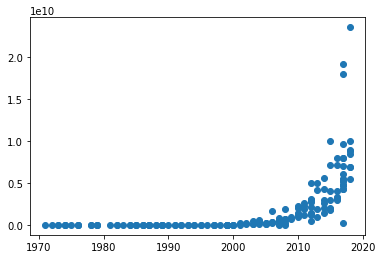

In [167]:
plt.scatter(X,Y);

In [168]:
Y = log_scale(Y)

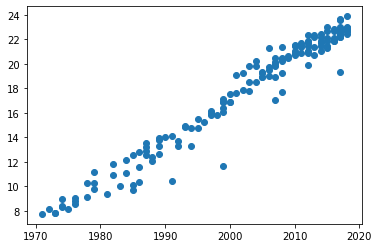

In [169]:
plt.scatter(X,Y);

In [182]:
X,Y,mx,my,sx,sy = normalizer(X,Y,cast=True,normal=True)

In [183]:
# units will be unimportant

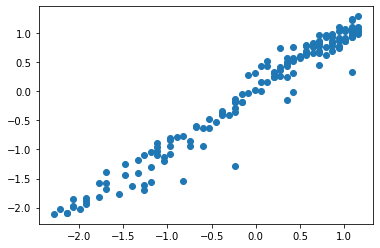

In [184]:
plt.scatter(X,Y);

In [185]:
# model, losses = create_model(X,Y,100,lr=0.0000001) # if not normalized
model, losses = create_model(X,Y,100)

epoch 1/100, Loss: 1.2408
epoch 2/100, Loss: 1.1932
epoch 3/100, Loss: 1.1154
epoch 4/100, Loss: 1.0210
epoch 5/100, Loss: 0.9198
epoch 6/100, Loss: 0.8188
epoch 7/100, Loss: 0.7222
epoch 8/100, Loss: 0.6326
epoch 9/100, Loss: 0.5513
epoch 10/100, Loss: 0.4787
epoch 11/100, Loss: 0.4148
epoch 12/100, Loss: 0.3589
epoch 13/100, Loss: 0.3106
epoch 14/100, Loss: 0.2690
epoch 15/100, Loss: 0.2333
epoch 16/100, Loss: 0.2029
epoch 17/100, Loss: 0.1771
epoch 18/100, Loss: 0.1551
epoch 19/100, Loss: 0.1366
epoch 20/100, Loss: 0.1209
epoch 21/100, Loss: 0.1077
epoch 22/100, Loss: 0.0966
epoch 23/100, Loss: 0.0872
epoch 24/100, Loss: 0.0793
epoch 25/100, Loss: 0.0727
epoch 26/100, Loss: 0.0672
epoch 27/100, Loss: 0.0625
epoch 28/100, Loss: 0.0586
epoch 29/100, Loss: 0.0554
epoch 30/100, Loss: 0.0526
epoch 31/100, Loss: 0.0503
epoch 32/100, Loss: 0.0484
epoch 33/100, Loss: 0.0468
epoch 34/100, Loss: 0.0454
epoch 35/100, Loss: 0.0443
epoch 36/100, Loss: 0.0433
epoch 37/100, Loss: 0.0426
epoch 38/1

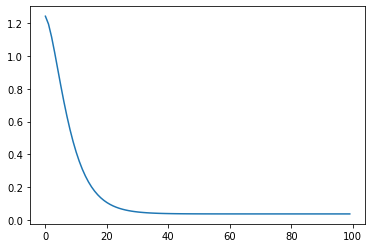

In [186]:
plt.plot(losses);

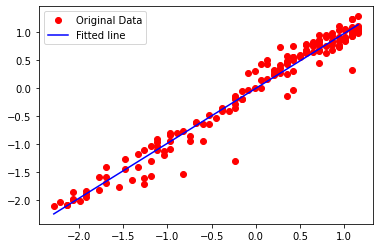

In [187]:
predicted = plot_line_data(model,X,Y)

In [188]:
params = print_model_parameters(model,1)

In [189]:
params

[array([[0.9803622]], dtype=float32), array([4.623763e-05], dtype=float32)]

### Inverse transform of data

In [190]:
# a = w * (Sy/Sx)

In [191]:
a = params[0][0,0] * sy/sx

In [192]:
a

0.34160966

### Exponential Growth Model

In [193]:
# n* time = log(n) / a
double_time = np.log(2)/a
print(double_time)

2.0290620207610934
